In [47]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

## Tidy Data

Principle 1: column names need to be informative, variable names and not values

Principle 2: each column needs to consist of one and only one variable

Principle 3: variables need to be in cells, not rows and columns

Principle 4: each table column needs to have a singular data type

Principle 5: a single observational units must be in 1 table

### Annex - Classification of countries and areas by major area and region

In [56]:
annex = pd.read_excel('UN_MigrantStockTotal_2015.xlsx', sheet_name='ANNEX', skiprows=14, usecols=['Country code', 'Country or area', 'Major area', 'Region', 'Developed region', 'Least developed country', 'Sub-Saharan Africa'])
annex.head()

,Country code,Country or area,Major area,Region,Developed region,Least developed country,Sub-Saharan Africa
0,4,Afghanistan,Asia,Southern Asia,No,Yes,No
1,8,Albania,Europe,Southern Europe,Yes,No,No
2,12,Algeria,Africa,Northern Africa,No,No,No
3,16,American Samoa,Oceania,Polynesia,No,No,No
4,20,Andorra,Europe,Southern Europe,Yes,No,No


### Table 1 - International migrant stock at mid-year by sex and by major area, region, country or area, 1990-2015

In [57]:
df = pd.read_excel('UN_MigrantStockTotal_2015.xlsx', sheet_name='Table 1', skiprows=15)
df.replace('..', np.NAN, inplace=True)

column_names = ['Sort order', 'Destination', 'Notes', 'Country code', 'Type of data', 
                   '1990B','1995B','2000B','2005B','2010B','2015B',
                   '1990M','1995M','2000M','2005M','2010M','2015M',
                   '1990F','1995F','2000F','2005F','2010F','2015F'
                   ]

df.columns = column_names
df.head()

,Sort order,Destination,Notes,Country code,Type of data,1990B,1995B,2000B,2005B,2010B,...,2000M,2005M,2010M,2015M,1990F,1995F,2000F,2005F,2010F,2015F
0,1,WORLD,NaN,900,NaN,152563212.0,160801752.0,172703309.0,191269100.0,221714243,...,87884839.0,97866674.0,114613714,126115435,74815702.0,79064275.0,84818470.0,93402426.0,107100529,117584801
1,2,Developed regions,(b),901,NaN,82378628.0,92306854.0,103375363.0,117181109.0,132560325,...,50536796.0,57217777.0,64081077,67618619,42115231.0,47214055.0,52838567.0,59963332.0,68479248,72863336
2,3,Developing regions,(c),902,NaN,70184584.0,68494898.0,69327946.0,74087991.0,89153918,...,37348043.0,40648897.0,50532637,58496816,32700471.0,31850220.0,31979903.0,33439094.0,38621281,44721465
3,4,Least developed countries,(d),941,NaN,11075966.0,11711703.0,10077824.0,9809634.0,10018128,...,5361902.0,5383009.0,5462714,6463217,5236216.0,5573685.0,4721920.0,4432371.0,4560536,5493028
4,5,Less developed regions excluding least develop...,NaN,934,NaN,59105261.0,56778501.0,59244124.0,64272611.0,79130668,...,31986141.0,35265888.0,45069923,52033599,27464255.0,26276535.0,27257983.0,29006723.0,34060745,39228437


In [58]:
df = df.melt(id_vars=column_names[:5], var_name='Year Sex', value_name='International Migrant Stock')
df['Year'] = df['Year Sex'].apply(lambda x: x[:4])
df['Sex'] = df['Year Sex'].apply(lambda x: x[-1])
df['Sex'] = df['Sex'].map({'B': 'Both Sexes', 'F': 'Female', 'M': 'Male'})
df.drop(columns=['Year Sex'], inplace=True)
df.head()

,Sort order,Destination,Notes,Country code,Type of data,International Migrant Stock,Year,Sex
0,1,WORLD,NaN,900,NaN,152563212.0,1990,Both Sexes
1,2,Developed regions,(b),901,NaN,82378628.0,1990,Both Sexes
2,3,Developing regions,(c),902,NaN,70184584.0,1990,Both Sexes
3,4,Least developed countries,(d),941,NaN,11075966.0,1990,Both Sexes
4,5,Less developed regions excluding least develop...,NaN,934,NaN,59105261.0,1990,Both Sexes


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4770 entries, 0 to 4769
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sort order                   4770 non-null   int64  
 1   Destination                  4770 non-null   object 
 2   Notes                        468 non-null    object 
 3   Country code                 4770 non-null   int64  
 4   Type of data                 4176 non-null   object 
 5   International Migrant Stock  4725 non-null   float64
 6   Year                         4770 non-null   object 
 7   Sex                          4770 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 298.2+ KB


In [60]:
df.drop(columns=['Notes', 'Type of data'], inplace=True)
df['Year'] = df['Year'].astype(int)
df.head()

,Sort order,Destination,Country code,International Migrant Stock,Year,Sex
0,1,WORLD,900,152563212.0,1990,Both Sexes
1,2,Developed regions,901,82378628.0,1990,Both Sexes
2,3,Developing regions,902,70184584.0,1990,Both Sexes
3,4,Least developed countries,941,11075966.0,1990,Both Sexes
4,5,Less developed regions excluding least develop...,934,59105261.0,1990,Both Sexes


In [61]:
annex_df = pd.merge(left=df, right=annex, on='Country code', how='right')
annex_df.head()

,Sort order,Destination,Country code,International Migrant Stock,Year,Sex,Country or area,Major area,Region,Developed region,Least developed country,Sub-Saharan Africa
0,99,Afghanistan,4,57686.0,1990,Both Sexes,Afghanistan,Asia,Southern Asia,No,Yes,No
1,99,Afghanistan,4,71522.0,1995,Both Sexes,Afghanistan,Asia,Southern Asia,No,Yes,No
2,99,Afghanistan,4,75917.0,2000,Both Sexes,Afghanistan,Asia,Southern Asia,No,Yes,No
3,99,Afghanistan,4,87300.0,2005,Both Sexes,Afghanistan,Asia,Southern Asia,No,Yes,No
4,99,Afghanistan,4,102246.0,2010,Both Sexes,Afghanistan,Asia,Southern Asia,No,Yes,No


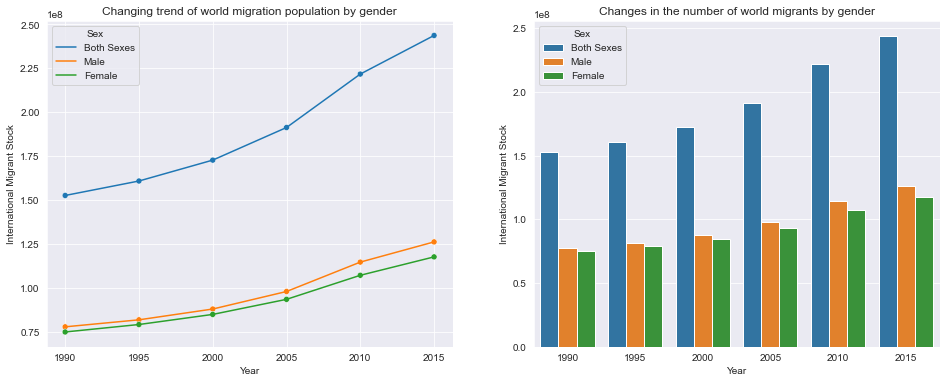

In [62]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.lineplot(data = df[df['Destination'] == 'WORLD'], x='Year', y='International Migrant Stock', hue='Sex')
sns.scatterplot(data = df[df['Destination'] == 'WORLD'], x='Year', y='International Migrant Stock', hue='Sex', legend=False)
plt.title('Changing trend of world migration population by gender')

plt.subplot(1, 2, 2)
sns.barplot(data = df[df['Destination'] == 'WORLD'], x='Year', y='International Migrant Stock', hue='Sex')
plt.title('Changes in the number of world migrants by gender')
plt.show()

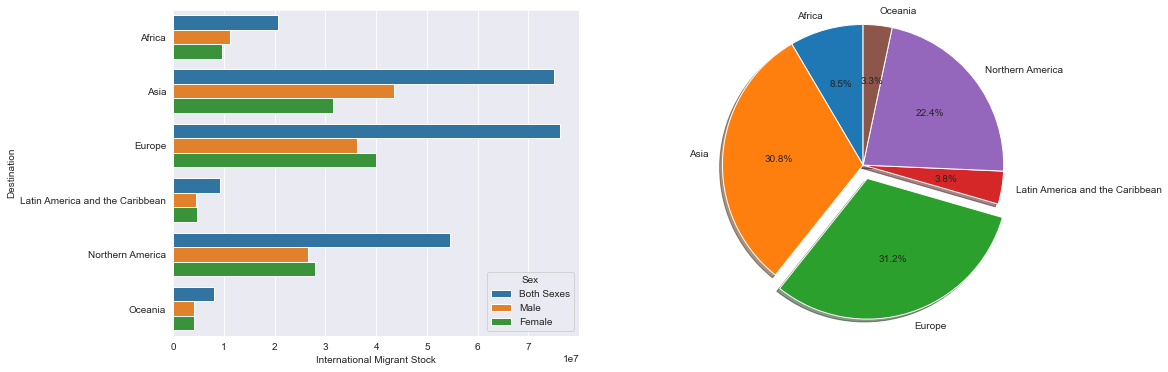

In [9]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
areas = annex_df['Major area'].unique().tolist()
sns.barplot(y='Destination', x='International Migrant Stock', data=df[(df['Year'] == 2015) & (df['Destination'].isin(areas))], hue='Sex')

plt.subplot(1, 2, 2)
tmp = df[(df['Year'] == 2015) & (df['Destination'].isin(areas) & (df['Sex'] == 'Both Sexes'))][['Destination', 'International Migrant Stock']]
tmp['size'] = tmp['International Migrant Stock'] / tmp['International Migrant Stock'].sum() * 100

labels = tmp['Destination'].values
sizes = tmp['size'].values
explode = (0, 0, 0.1, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')
plt.show()

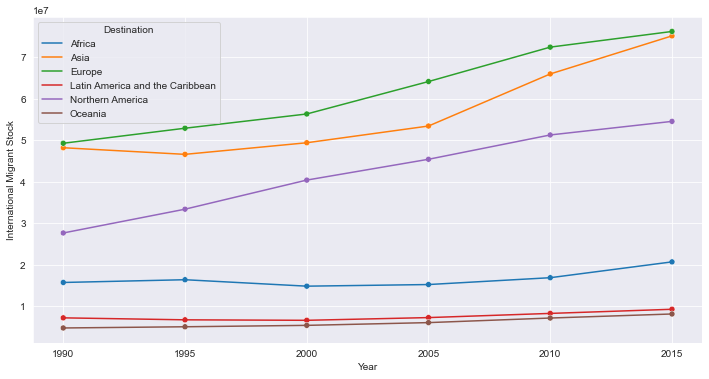

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df[(df['Destination'].isin(areas)) & (df['Sex'] == 'Both Sexes')], x='Year', y='International Migrant Stock', hue='Destination')
sns.scatterplot(data=df[(df['Destination'].isin(areas)) & (df['Sex'] == 'Both Sexes')], x='Year', y='International Migrant Stock', hue='Destination', legend=False)
plt.show()

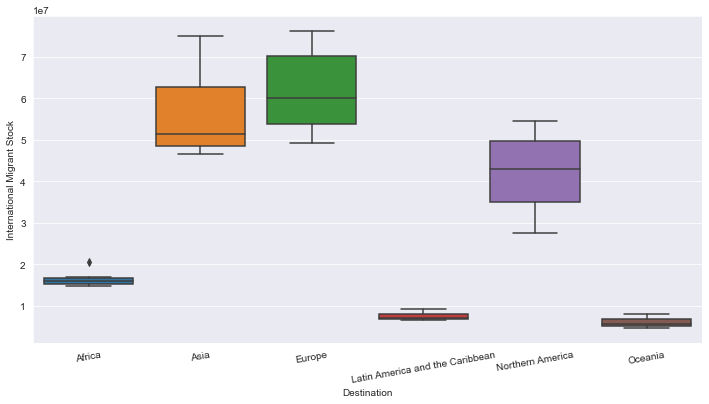

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[(df['Sex'] == 'Both Sexes') & (df['Destination'].isin(areas))], x='Destination', y='International Migrant Stock')
plt.xticks(rotation=10)
plt.show()

### Table 2 -  Total population at mid-year by sex and by major area, region, country or area, 1990-2015

In [12]:
df = pd.read_excel('UN_MigrantStockTotal_2015.xlsx', sheet_name='Table 2', skiprows=15)
df.replace('..', np.NAN, inplace=True)

column_names = ['Sort order', 'Destination', 'Notes', 'Country code',
                   '1990B','1995B','2000B','2005B','2010B','2015B',
                   '1990M','1995M','2000M','2005M','2010M','2015M',
                   '1990F','1995F','2000F','2005F','2010F','2015F'
                   ]

df.columns = column_names
df.head()

,Sort order,Destination,Notes,Country code,1990B,1995B,2000B,2005B,2010B,2015B,...,2000M,2005M,2010M,2015M,1990F,1995F,2000F,2005F,2010F,2015F
0,1,WORLD,NaN,900,5309667.699,5735123.084,6126622.121,6519635.850,6929725.043,7349472.099,...,3084537.662,3285082.249,3493956.904,3707205.753,2639243.998,2848487.191,3042084.459,3234553.601,3435768.139,3642266.346
1,2,Developed regions,(b),901,1144463.062,1169761.211,1188811.731,1208919.509,1233375.711,1251351.086,...,578010.218,587962.213,599955.476,609297.148,589207.436,601492.755,610801.513,620957.296,633420.235,642053.938
2,3,Developing regions,(c),902,4165204.637,4565361.873,4937810.390,5310716.341,5696349.332,6098121.013,...,2506527.444,2697120.036,2894001.428,3097908.605,2050036.562,2246994.436,2431282.946,2613596.305,2802347.904,3000212.408
3,4,Least developed countries,(d),941,510057.629,585189.354,664386.087,752804.951,847254.847,954157.804,...,331482.475,375757.715,422397.532,476031.179,256015.073,293162.612,332903.612,377047.236,424857.315,478126.625
4,5,Less developed regions excluding least develop...,NaN,934,3655147.008,3980172.519,4273424.303,4557911.390,4849094.485,5143963.209,...,2175044.969,2321362.321,2471603.896,2621877.426,1794021.489,1953831.824,2098379.334,2236549.069,2377490.589,2522085.783


In [13]:
df = df.melt(id_vars=column_names[:4], var_name='Year Sex', value_name='Total Population')
df['Year'] = df['Year Sex'].apply(lambda x: x[:4])
df['Sex'] = df['Year Sex'].apply(lambda x: x[-1])
df['Sex'] = df['Sex'].map({'B': 'Both Sexes', 'F': 'Female', 'M': 'Male'})
df.drop(columns=['Year Sex'], inplace=True)
df.head()

,Sort order,Destination,Notes,Country code,Total Population,Year,Sex
0,1,WORLD,NaN,900,5309667.699,1990,Both Sexes
1,2,Developed regions,(b),901,1144463.062,1990,Both Sexes
2,3,Developing regions,(c),902,4165204.637,1990,Both Sexes
3,4,Least developed countries,(d),941,510057.629,1990,Both Sexes
4,5,Less developed regions excluding least develop...,NaN,934,3655147.008,1990,Both Sexes


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4770 entries, 0 to 4769
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sort order        4770 non-null   int64  
 1   Destination       4770 non-null   object 
 2   Notes             468 non-null    object 
 3   Country code      4770 non-null   int64  
 4   Total Population  4386 non-null   float64
 5   Year              4770 non-null   object 
 6   Sex               4770 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 261.0+ KB


In [15]:
df.drop(columns=['Notes'], inplace=True)
df['Year'] = df['Year'].astype(int)
df.head()

,Sort order,Destination,Country code,Total Population,Year,Sex
0,1,WORLD,900,5309667.699,1990,Both Sexes
1,2,Developed regions,901,1144463.062,1990,Both Sexes
2,3,Developing regions,902,4165204.637,1990,Both Sexes
3,4,Least developed countries,941,510057.629,1990,Both Sexes
4,5,Less developed regions excluding least develop...,934,3655147.008,1990,Both Sexes


In [16]:
annex_df = pd.merge(left=df, right=annex, on='Country code', how='right')
annex_df.head()

,Sort order,Destination,Country code,Total Population,Year,Sex,Country or area,Major area,Region,Developed region,Least developed country,Sub-Saharan Africa
0,99,Afghanistan,4,12067.570,1990,Both Sexes,Afghanistan,Asia,Southern Asia,No,Yes,No
1,99,Afghanistan,4,16772.522,1995,Both Sexes,Afghanistan,Asia,Southern Asia,No,Yes,No
2,99,Afghanistan,4,19701.940,2000,Both Sexes,Afghanistan,Asia,Southern Asia,No,Yes,No
3,99,Afghanistan,4,24399.948,2005,Both Sexes,Afghanistan,Asia,Southern Asia,No,Yes,No
4,99,Afghanistan,4,27962.207,2010,Both Sexes,Afghanistan,Asia,Southern Asia,No,Yes,No


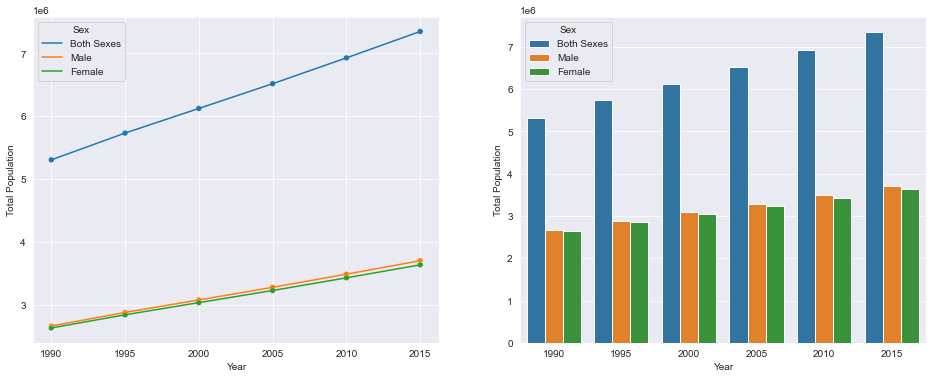

In [17]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.lineplot(data = df[df['Destination'] == 'WORLD'], x='Year', y='Total Population', hue='Sex')
sns.scatterplot(data = df[df['Destination'] == 'WORLD'], x='Year', y='Total Population', hue='Sex', legend=False)

plt.subplot(1, 2, 2)
sns.barplot(data = df[df['Destination'] == 'WORLD'], x='Year', y='Total Population', hue='Sex')
plt.show()

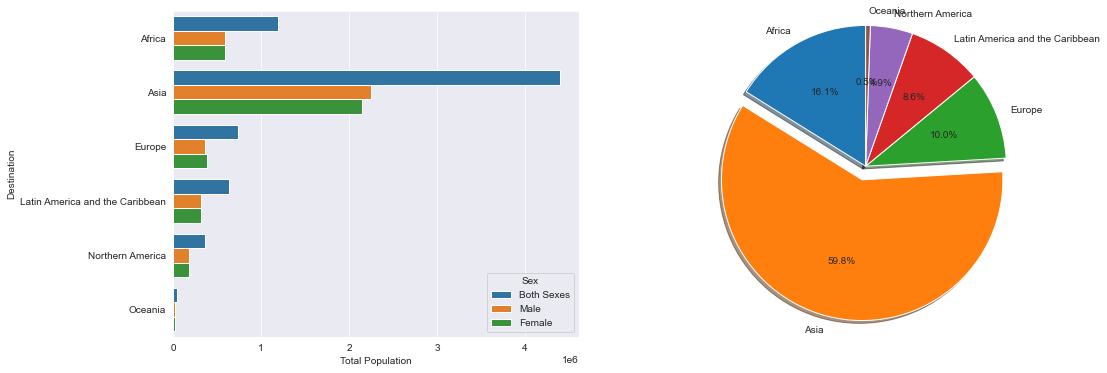

In [18]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
areas = annex_df['Major area'].unique().tolist()
sns.barplot(y='Destination', x='Total Population', data=df[(df['Year'] == 2015) & (df['Destination'].isin(areas))], hue='Sex')

plt.subplot(1, 2, 2)
tmp = df[(df['Year'] == 2015) & (df['Destination'].isin(areas) & (df['Sex'] == 'Both Sexes'))][['Destination', 'Total Population']]
tmp['size'] = tmp['Total Population'] / tmp['Total Population'].sum() * 100

labels = tmp['Destination'].values
sizes = tmp['size'].values
explode = (0, 0.1, 0, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')
plt.show()

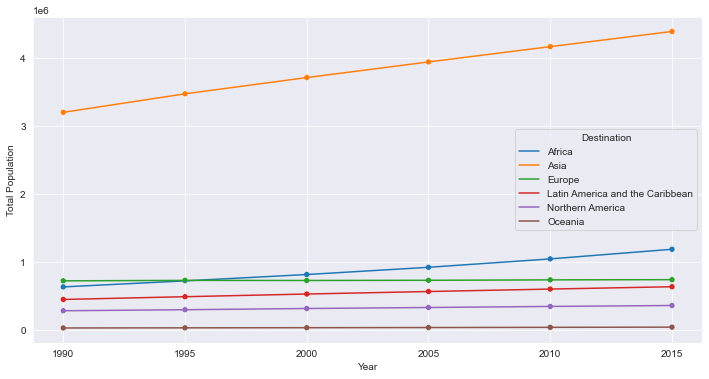

In [19]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df[(df['Destination'].isin(areas)) & (df['Sex'] == 'Both Sexes')], x='Year', y='Total Population', hue='Destination')
sns.scatterplot(data=df[(df['Destination'].isin(areas)) & (df['Sex'] == 'Both Sexes')], x='Year', y='Total Population', hue='Destination', legend=False)
plt.show()

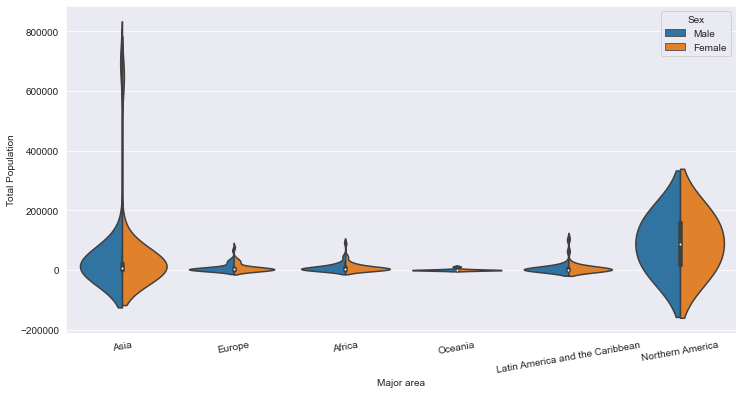

In [20]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=annex_df[(annex_df['Sex'].isin(['Female', 'Male'])) & (annex_df['Year'] == 2015)], x='Major area', y='Total Population', hue='Sex', split=True)
plt.xticks(rotation=10)
plt.show()

### Table 3 - International migrant stock as a percentage of the total population by sex and by major area, region, country or area, 1990-2015

In [21]:
df = pd.read_excel('UN_MigrantStockTotal_2015.xlsx', sheet_name='Table 3', skiprows=15)
df.replace('..', np.NAN, inplace=True)

column_names = ['Sort order', 'Destination', 'Notes', 'Country code', 'Type of data', 
                   '1990B','1995B','2000B','2005B','2010B','2015B',
                   '1990M','1995M','2000M','2005M','2010M','2015M',
                   '1990F','1995F','2000F','2005F','2010F','2015F'
                   ]

df.columns = column_names
df.head()

,Sort order,Destination,Notes,Country code,Type of data,1990B,1995B,2000B,2005B,2010B,...,2000M,2005M,2010M,2015M,1990F,1995F,2000F,2005F,2010F,2015F
0,1,WORLD,NaN,900,NaN,2.873310,2.803806,2.818899,2.933739,3.199467,...,2.849206,2.979124,3.280341,3.401900,2.834740,2.775658,2.788169,2.887645,3.117222,3.228342
1,2,Developed regions,(b),901,NaN,7.198015,7.891085,8.695688,9.693045,10.747765,...,8.743236,9.731540,10.680972,11.097807,7.147777,7.849480,8.650694,9.656595,10.811029,11.348476
2,3,Developing regions,(c),902,NaN,1.685021,1.500317,1.404022,1.395066,1.565106,...,1.490031,1.507122,1.746117,1.888268,1.595116,1.417459,1.315351,1.279428,1.378176,1.490610
3,4,Least developed countries,(d),941,NaN,2.171513,2.001353,1.516863,1.303078,1.182422,...,1.617552,1.432574,1.293264,1.357730,2.045276,1.901226,1.418405,1.175548,1.073428,1.148865
4,5,Less developed regions excluding least develop...,NaN,934,NaN,1.617042,1.426534,1.386338,1.410133,1.631865,...,1.470597,1.519189,1.823509,1.984593,1.530877,1.344872,1.299002,1.296941,1.432634,1.555397


In [22]:
df = df.melt(id_vars=column_names[:5], var_name='Year Sex', value_name='Percentage of Total Population')
df['Year'] = df['Year Sex'].apply(lambda x: x[:4])
df['Sex'] = df['Year Sex'].apply(lambda x: x[-1])
df['Sex'] = df['Sex'].map({'B': 'Both Sexes', 'F': 'Female', 'M': 'Male'})
df.drop(columns=['Year Sex'], inplace=True)
df.head()

,Sort order,Destination,Notes,Country code,Type of data,Percentage of Total Population,Year,Sex
0,1,WORLD,NaN,900,NaN,2.873310,1990,Both Sexes
1,2,Developed regions,(b),901,NaN,7.198015,1990,Both Sexes
2,3,Developing regions,(c),902,NaN,1.685021,1990,Both Sexes
3,4,Least developed countries,(d),941,NaN,2.171513,1990,Both Sexes
4,5,Less developed regions excluding least develop...,NaN,934,NaN,1.617042,1990,Both Sexes


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4770 entries, 0 to 4769
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Sort order                      4770 non-null   int64  
 1   Destination                     4770 non-null   object 
 2   Notes                           468 non-null    object 
 3   Country code                    4770 non-null   int64  
 4   Type of data                    4176 non-null   object 
 5   Percentage of Total Population  4343 non-null   float64
 6   Year                            4770 non-null   object 
 7   Sex                             4770 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 298.2+ KB


In [24]:
df.drop(columns=['Notes', 'Type of data'], inplace=True)
df['Year'] = df['Year'].astype(int)
df.head()

,Sort order,Destination,Country code,Percentage of Total Population,Year,Sex
0,1,WORLD,900,2.873310,1990,Both Sexes
1,2,Developed regions,901,7.198015,1990,Both Sexes
2,3,Developing regions,902,1.685021,1990,Both Sexes
3,4,Least developed countries,941,2.171513,1990,Both Sexes
4,5,Less developed regions excluding least develop...,934,1.617042,1990,Both Sexes


In [25]:
annex_df = pd.merge(left=df, right=annex, on='Country code', how='right')
annex_df.head()

,Sort order,Destination,Country code,Percentage of Total Population,Year,Sex,Country or area,Major area,Region,Developed region,Least developed country,Sub-Saharan Africa
0,99,Afghanistan,4,0.478025,1990,Both Sexes,Afghanistan,Asia,Southern Asia,No,Yes,No
1,99,Afghanistan,4,0.426424,1995,Both Sexes,Afghanistan,Asia,Southern Asia,No,Yes,No
2,99,Afghanistan,4,0.385328,2000,Both Sexes,Afghanistan,Asia,Southern Asia,No,Yes,No
3,99,Afghanistan,4,0.357788,2005,Both Sexes,Afghanistan,Asia,Southern Asia,No,Yes,No
4,99,Afghanistan,4,0.365658,2010,Both Sexes,Afghanistan,Asia,Southern Asia,No,Yes,No


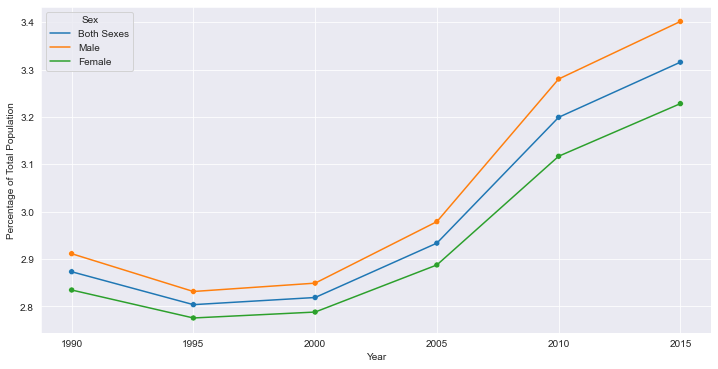

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(data = df[df['Destination'] == 'WORLD'], x='Year', y='Percentage of Total Population', hue='Sex')
sns.scatterplot(data = df[df['Destination'] == 'WORLD'], x='Year', y='Percentage of Total Population', hue='Sex', legend=False)
plt.show()

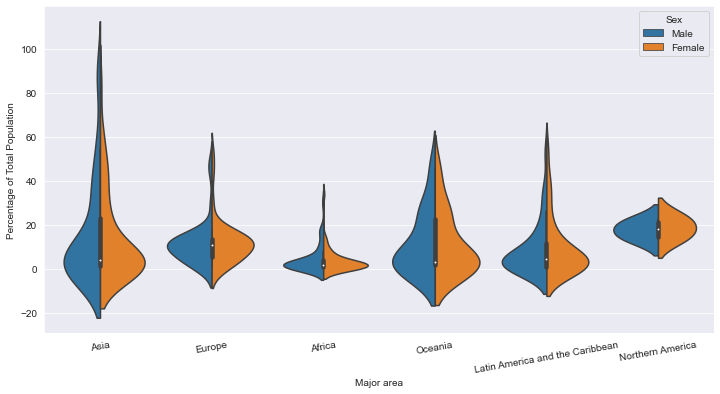

In [27]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=annex_df[(annex_df['Sex'].isin(['Female', 'Male'])) & (annex_df['Year'] == 2015)], x='Major area', y='Percentage of Total Population', hue='Sex', split=True)
plt.xticks(rotation=10)
plt.show()

### Table 4 - Female migrants as a percentage of the international migrant stock by major area, region, country or area, 1990-2015

In [28]:
df = pd.read_excel('UN_MigrantStockTotal_2015.xlsx', sheet_name='Table 4', skiprows=15)
df.replace('..', np.NAN, inplace=True)

column_names = ['Sort order', 'Destination', 'Notes', 'Country code', 'Type of data', 
                   '1990','1995','2000','2005','2010','2015'
                   ]

df.columns = column_names
df.head()

,Sort order,Destination,Notes,Country code,Type of data,1990,1995,2000,2005,2010,2015
0,1,WORLD,NaN,900,NaN,49.039150,49.168790,49.112244,48.832993,48.305660,48.249769
1,2,Developed regions,(b),901,NaN,51.123977,51.149024,51.113307,51.171501,51.658932,51.866687
2,3,Developing regions,(c),902,NaN,46.592099,46.500135,46.128444,45.134297,43.319780,43.327078
3,4,Least developed countries,(d),941,NaN,47.261155,47.571664,46.826689,45.157406,45.499573,45.942752
4,5,Less developed regions excluding least develop...,NaN,934,NaN,46.466684,46.279022,46.009598,45.130768,43.043672,42.984398


In [29]:
df = df.melt(id_vars=column_names[:5], var_name='Year', value_name='Percentage of International Migrant Stock')
df.head()

,Sort order,Destination,Notes,Country code,Type of data,Year,Percentage of International Migrant Stock
0,1,WORLD,NaN,900,NaN,1990,49.039150
1,2,Developed regions,(b),901,NaN,1990,51.123977
2,3,Developing regions,(c),902,NaN,1990,46.592099
3,4,Least developed countries,(d),941,NaN,1990,47.261155
4,5,Less developed regions excluding least develop...,NaN,934,NaN,1990,46.466684


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1590 entries, 0 to 1589
Data columns (total 7 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sort order                                 1590 non-null   int64  
 1   Destination                                1590 non-null   object 
 2   Notes                                      156 non-null    object 
 3   Country code                               1590 non-null   int64  
 4   Type of data                               1392 non-null   object 
 5   Year                                       1590 non-null   object 
 6   Percentage of International Migrant Stock  1575 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 87.1+ KB


In [31]:
df.drop(columns=['Notes', 'Type of data'], inplace=True)
df['Year'] = df['Year'].astype(int)
df.head()

,Sort order,Destination,Country code,Year,Percentage of International Migrant Stock
0,1,WORLD,900,1990,49.039150
1,2,Developed regions,901,1990,51.123977
2,3,Developing regions,902,1990,46.592099
3,4,Least developed countries,941,1990,47.261155
4,5,Less developed regions excluding least develop...,934,1990,46.466684


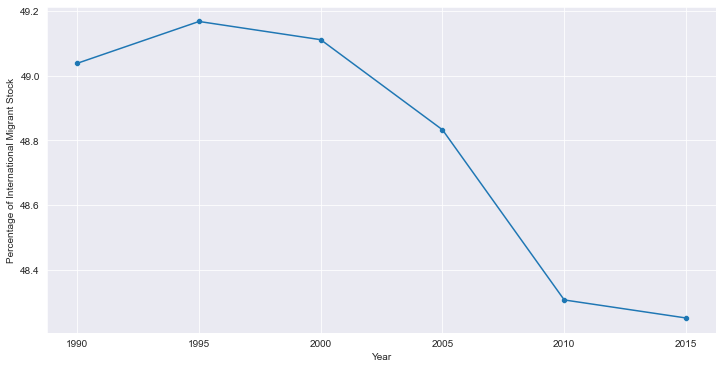

In [32]:
plt.figure(figsize=(12, 6))
sns.lineplot(data = df[df['Destination'] == 'WORLD'], x='Year', y='Percentage of International Migrant Stock')
sns.scatterplot(data = df[df['Destination'] == 'WORLD'], x='Year', y='Percentage of International Migrant Stock', legend=False)
plt.show()

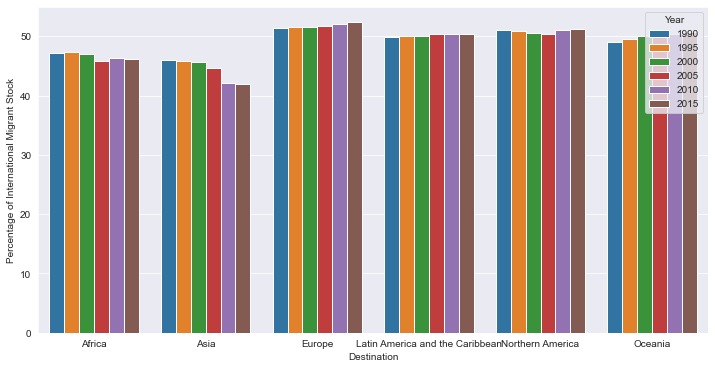

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df[df['Destination'].isin(areas)], x='Destination', y='Percentage of International Migrant Stock', hue='Year')
plt.show() 

### Table 5 - Annual rate of change of the migrant stock by sex and by major area, region, country or area, 1990-2015

In [34]:
df = pd.read_excel('UN_MigrantStockTotal_2015.xlsx', sheet_name='Table 5', skiprows=15)
df.replace('..', np.NAN, inplace=True)

column_names = ['Sort order', 'Destination', 'Notes', 'Country code', 'Type of data', 
                   '1990-1995B','1995-2000B','2000-2005B','2005-2010B','2010-2015B',
                   '1990-1995M','1995-2000M','2000-2005M','2005-2010M','2010-2015M',
                   '1990-1995F','1995-2000F','2000-2005F','2005-2010F','2010-2015F',
                   ]

df.columns = column_names
df.head()

,Sort order,Destination,Notes,Country code,Type of data,1990-1995B,1995-2000B,2000-2005B,2005-2010B,2010-2015B,1990-1995M,1995-2000M,2000-2005M,2005-2010M,2010-2015M,1990-1995F,1995-2000F,2000-2005F,2005-2010F,2010-2015F
0,1,WORLD,NaN,900,NaN,1.051865,1.428058,2.042124,2.954160,1.890991,1.000922,1.450294,2.151575,3.159228,1.912603,1.104667,1.405044,1.928080,2.737012,1.867837
1,2,Developed regions,(b),901,NaN,2.275847,2.264965,2.507080,2.466343,1.160824,2.265595,2.279583,2.483259,2.265689,1.074685,2.285643,2.250995,2.529838,2.655950,1.241097
2,3,Developing regions,(c),902,NaN,-0.487389,0.241777,1.328107,3.702217,2.929634,-0.452980,0.380246,1.693824,4.352954,2.927058,-0.526904,0.081268,0.892360,2.881555,2.933003
3,4,Least developed countries,(d),941,NaN,1.118175,-3.001139,-0.539636,0.419137,3.526927,1.000073,-2.718952,0.078575,0.293964,3.363629,1.249146,-3.316818,-1.265617,0.570110,3.720790
4,5,Less developed regions excluding least develop...,NaN,934,NaN,-0.803244,0.850177,1.629340,4.159339,2.852687,-0.733256,0.950231,1.952269,4.905980,2.873490,-0.884180,0.733402,1.243624,3.212358,2.825127


In [35]:
df = df.melt(id_vars=column_names[:5], var_name='Year Sex', value_name='Annual rate of change of the migrant stock ')
df['Year'] = df['Year Sex'].apply(lambda x: x[:9])
df['Sex'] = df['Year Sex'].apply(lambda x: x[-1])
df['Sex'] = df['Sex'].map({'B': 'Both Sexes', 'F': 'Female', 'M': 'Male'})
df.drop(columns=['Year Sex'], inplace=True)
df.head()

,Sort order,Destination,Notes,Country code,Type of data,Annual rate of change of the migrant stock,Year,Sex
0,1,WORLD,NaN,900,NaN,1.051865,1990-1995,Both Sexes
1,2,Developed regions,(b),901,NaN,2.275847,1990-1995,Both Sexes
2,3,Developing regions,(c),902,NaN,-0.487389,1990-1995,Both Sexes
3,4,Least developed countries,(d),941,NaN,1.118175,1990-1995,Both Sexes
4,5,Less developed regions excluding least develop...,NaN,934,NaN,-0.803244,1990-1995,Both Sexes


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3975 entries, 0 to 3974
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Sort order                                   3975 non-null   int64  
 1   Destination                                  3975 non-null   object 
 2   Notes                                        390 non-null    object 
 3   Country code                                 3975 non-null   int64  
 4   Type of data                                 3480 non-null   object 
 5   Annual rate of change of the migrant stock   3930 non-null   float64
 6   Year                                         3975 non-null   object 
 7   Sex                                          3975 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 248.6+ KB


In [37]:
df.drop(columns=['Notes', 'Type of data'], inplace=True)
df.head()

,Sort order,Destination,Country code,Annual rate of change of the migrant stock,Year,Sex
0,1,WORLD,900,1.051865,1990-1995,Both Sexes
1,2,Developed regions,901,2.275847,1990-1995,Both Sexes
2,3,Developing regions,902,-0.487389,1990-1995,Both Sexes
3,4,Least developed countries,941,1.118175,1990-1995,Both Sexes
4,5,Less developed regions excluding least develop...,934,-0.803244,1990-1995,Both Sexes


In [38]:
annex_df = pd.merge(left=df, right=annex, on='Country code', how='right')
annex_df.head()

,Sort order,Destination,Country code,Annual rate of change of the migrant stock,Year,Sex,Country or area,Major area,Region,Developed region,Least developed country,Sub-Saharan Africa
0,99,Afghanistan,4,4.299812,1990-1995,Both Sexes,Afghanistan,Asia,Southern Asia,No,Yes,No
1,99,Afghanistan,4,1.192711,1995-2000,Both Sexes,Afghanistan,Asia,Southern Asia,No,Yes,No
2,99,Afghanistan,4,2.794196,2000-2005,Both Sexes,Afghanistan,Asia,Southern Asia,No,Yes,No
3,99,Afghanistan,4,3.160624,2005-2010,Both Sexes,Afghanistan,Asia,Southern Asia,No,Yes,No
4,99,Afghanistan,4,26.379880,2010-2015,Both Sexes,Afghanistan,Asia,Southern Asia,No,Yes,No


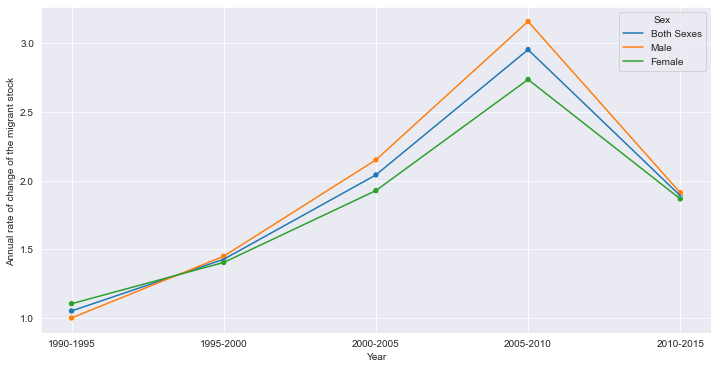

In [39]:
plt.figure(figsize=(12, 6))
sns.lineplot(data = df[df['Destination'] == 'WORLD'], x='Year', y='Annual rate of change of the migrant stock ', hue='Sex')
sns.scatterplot(data = df[df['Destination'] == 'WORLD'], x='Year', y='Annual rate of change of the migrant stock ', hue='Sex', legend=False)
plt.show()

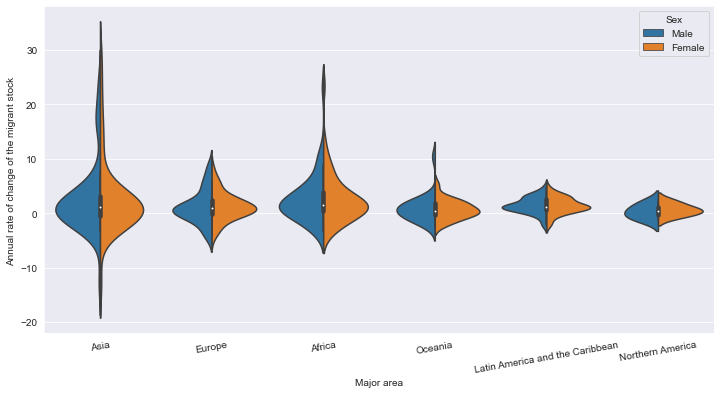

In [40]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=annex_df[(annex_df['Sex'].isin(['Female', 'Male'])) & (annex_df['Year'] == '2010-2015')], x='Major area', y='Annual rate of change of the migrant stock ', hue='Sex', split=True)
plt.xticks(rotation=10)
plt.show()

### Table 6 - Estimated refugee stock at mid-year by major area, region, country or area, 1990-2015

In [41]:
df = pd.read_excel('UN_MigrantStockTotal_2015.xlsx', sheet_name='Table 6', skiprows=15)
df.replace('..', np.NAN, inplace=True)

column_names = ['Sort order', 'Destination', 'Notes', 'Country code', 'Type of data', 
                   '1990E','1995E','2000E','2005E','2010E','2015E',
                   '1990R','1995R','2000R','2005R','2010R','2015R',
                   '1990-1995A','1995-2000A','2000-2005A','2005-2010A','2010-2015A',
                   ]

df.columns = column_names
df.head()

,Sort order,Destination,Notes,Country code,Type of data,1990E,1995E,2000E,2005E,2010E,...,1995R,2000R,2005R,2010R,2015R,1990-1995A,1995-2000A,2000-2005A,2005-2010A,2010-2015A
0,1,WORLD,NaN,900,NaN,18836571.0,17853840.0,15827803.0,13276733.0,15370755,...,11.103013,9.164736,6.941389,6.932687,8.033424,-2.123497,-3.837069,-5.557223,-0.025089,2.947267
1,2,Developed regions,(b),901,NaN,2014564.0,3609670.0,2997256.0,2361229.0,2046917,...,3.910511,2.899391,2.015025,1.544140,1.391085,9.388424,-5.983348,-7.277379,-5.323293,-2.087656
2,3,Developing regions,(c),902,NaN,16822007.0,14244170.0,12830547.0,10915504.0,13323838,...,20.795958,18.507035,14.733162,14.944759,17.073768,-2.839417,-2.332154,-4.561000,0.285195,2.663652
3,4,Least developed countries,(d),941,NaN,5048391.0,5160131.0,3047488.0,2363782.0,1957884,...,44.041961,30.221557,24.082430,19.533425,28.801534,-0.680327,-7.531747,-4.541459,-4.187109,7.766031
4,5,Less developed regions excluding least develop...,NaN,934,NaN,11773616.0,9084039.0,9783059.0,8551722.0,11365954,...,15.999082,16.513130,13.305391,14.363526,15.537313,-4.383600,0.632489,-4.319731,1.530456,1.571047


In [42]:
df = df.melt(id_vars=column_names[:5], var_name='Year Type', value_name='Value')
df['Year'] = df['Year Type'].apply(lambda x: x[:-1])
df['Type'] = df['Year Type'].apply(lambda x: x[-1])
df['Type'] = df['Type'].map({'E': 'Estimated refugee stock', 'R': 'Refugees percentage', 'A': 'Annual rate'})
df.drop(columns=['Year Type'], inplace=True)
df.head()

,Sort order,Destination,Notes,Country code,Type of data,Value,Year,Type
0,1,WORLD,NaN,900,NaN,18836571.0,1990,Estimated refugee stock
1,2,Developed regions,(b),901,NaN,2014564.0,1990,Estimated refugee stock
2,3,Developing regions,(c),902,NaN,16822007.0,1990,Estimated refugee stock
3,4,Least developed countries,(d),941,NaN,5048391.0,1990,Estimated refugee stock
4,5,Less developed regions excluding least develop...,NaN,934,NaN,11773616.0,1990,Estimated refugee stock


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4505 entries, 0 to 4504
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sort order    4505 non-null   int64  
 1   Destination   4505 non-null   object 
 2   Notes         442 non-null    object 
 3   Country code  4505 non-null   int64  
 4   Type of data  3944 non-null   object 
 5   Value         4044 non-null   float64
 6   Year          4505 non-null   object 
 7   Type          4505 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 281.7+ KB


In [44]:
df.drop(columns=['Notes', 'Type of data'], inplace=True)
df.head()

,Sort order,Destination,Country code,Value,Year,Type
0,1,WORLD,900,18836571.0,1990,Estimated refugee stock
1,2,Developed regions,901,2014564.0,1990,Estimated refugee stock
2,3,Developing regions,902,16822007.0,1990,Estimated refugee stock
3,4,Least developed countries,941,5048391.0,1990,Estimated refugee stock
4,5,Less developed regions excluding least develop...,934,11773616.0,1990,Estimated refugee stock


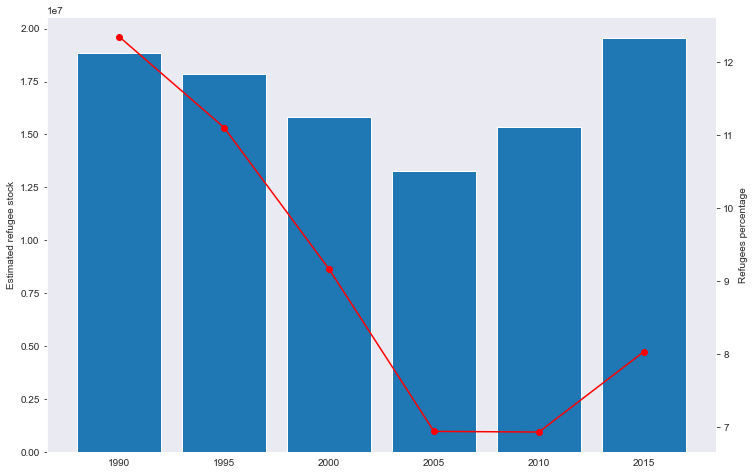

In [45]:
sns.set_style('dark')
fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(111)
ax1.set_ylabel('Estimated refugee stock')
ax1.bar(df[(df['Destination'] == 'WORLD') & (df['Type'] == 'Estimated refugee stock')]['Year'].values, df[(df['Destination'] == 'WORLD') & (df['Type'] == 'Estimated refugee stock')]['Value'].values)


ax2 = ax1.twinx()
ax2.set_ylabel('Refugees percentage')
ax2.plot(df[(df['Destination'] == 'WORLD') & (df['Type'] == 'Estimated refugee stock')]['Year'].values, df[(df['Destination'] == 'WORLD') & (df['Type'] == 'Refugees percentage')]['Value'].values
        ,color='red', marker='o')
plt.show()

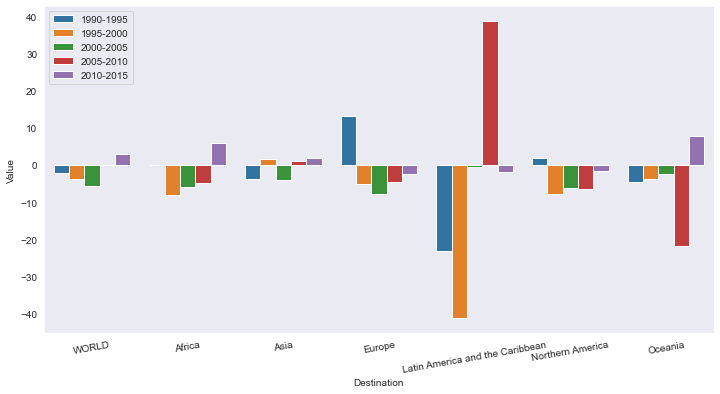

In [46]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df[(df['Type'] == 'Annual rate') & (df['Destination'].isin(areas + ['WORLD']))], x='Destination', y='Value', hue='Year')
plt.xticks(rotation=10)
# sns.scatterplot(data=df[(df['Type'] == 'Annual rate') & (df['Destination'].isin(areas + ['WORLD']))], x='Year', y='Value', hue='Destination', legend=False)
plt.legend(loc='upper left')